In [1]:
import numpy as np
from skopt import load
from skopt.plots import plot_evaluations, plot_objective, plot_convergence
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Plot options
plt.set_cmap("viridis")
sns.set()
sns.set_style("whitegrid")

/usr/local/anaconda3/envs/da/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


<Figure size 432x288 with 0 Axes>

In [2]:
# Print available checkpoints
cp_dir = Path('../runs/optimizer')
for p in cp_dir.glob('*multitask*fix*'):
     print(p.name)

multitask_ft_fix_dw
multitask_ft_fix_wa
multitask_ft_fix_ad
multitask_ft_fix_aw
multitask_ft_fix_da
multitask_ft_fix_wd


In [9]:
# Load checkpoint
experiment_id = 'multitask_ft_fix_ad'
cp_path = cp_dir / experiment_id / 'checkpoint.pkl'
res = load(str(cp_path.resolve()))

In [10]:
print('iterations: {}'.format(len(res.x_iters)))
print('max acc: {}'.format(-res.fun))
print('best hyper parameters:')
params = dict(zip([s.name for s in res.space], res.x))
params

iterations: 70
max acc: 0.8591096379346653
best hyper parameters:


{'lr': 1e-08,
 'inv_mom': 0.03020646856873491,
 'lr_decay': 0.01,
 'dropout': 0.8,
 'l2': 0.001,
 'ce_ratio': 0.4538664294387168,
 'loss_param_1': 100.0,
 'num_unfrozen': 16}

In [11]:
df = pd.DataFrame(
    [[-x[0], *x[1]] for x in list(zip(res.func_vals, res.x_iters))],
    columns=['acc', *[s.name for s in res.space]]
).reset_index().sort_values('acc', ascending=False)
df['mom'] = 1-df['inv_mom']
df.head(20)

,index,acc,lr,inv_mom,lr_decay,dropout,l2,ce_ratio,loss_param_1,num_unfrozen,mom
31,31,0.859110,1.000000e-08,0.030206,1.000000e-02,0.800000,1.000000e-03,0.453866,100.000000,16,0.969794
49,49,0.853445,1.000000e-08,0.012639,1.000000e-07,0.800000,1.000000e-03,0.859851,0.000022,16,0.987361
57,57,0.853431,4.796336e-04,0.092124,1.251602e-05,0.799438,5.708102e-06,0.662829,0.096647,16,0.907876
42,42,0.852614,1.000000e-03,0.010000,1.000000e-07,0.800000,1.822507e-07,0.900993,100.000000,16,0.990000
26,26,0.849120,1.089194e-06,0.010000,1.000000e-02,0.800000,2.421697e-04,0.428012,100.000000,16,0.990000
60,60,0.846218,1.358115e-05,0.034610,1.293460e-07,0.772562,2.164305e-04,0.648615,0.000025,16,0.965390
43,43,0.846162,7.865850e-07,0.068473,1.000000e-07,0.800000,1.167742e-07,0.747873,13.346660,16,0.931527
66,66,0.843332,1.160389e-05,0.072348,1.301526e-06,0.786950,2.705128e-05,0.677207,78.463820,12,0.927652
45,45,0.841739,1.000000e-08,0.500000,1.000000e-07,0.800000,1.000000e-03,1.000000,100.000000,16,0.500000
67,67,0.840878,2.599323e-06,0.056108,2.089821e-05,0.771917,1.424019e-05,0.732914,1.943225,14,0.943892


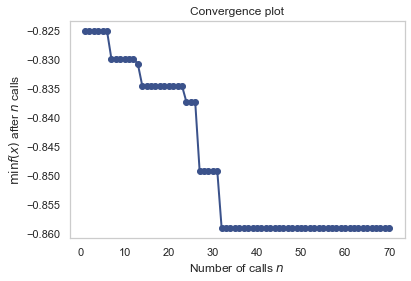

In [12]:
conv_fig = plot_convergence(res)

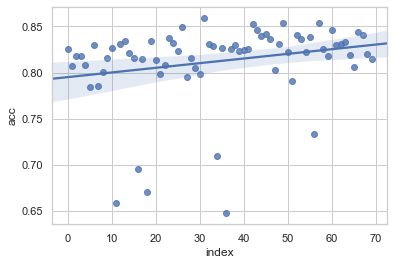

In [13]:
reg_fig = sns.regplot(x='index', y='acc', data=df)

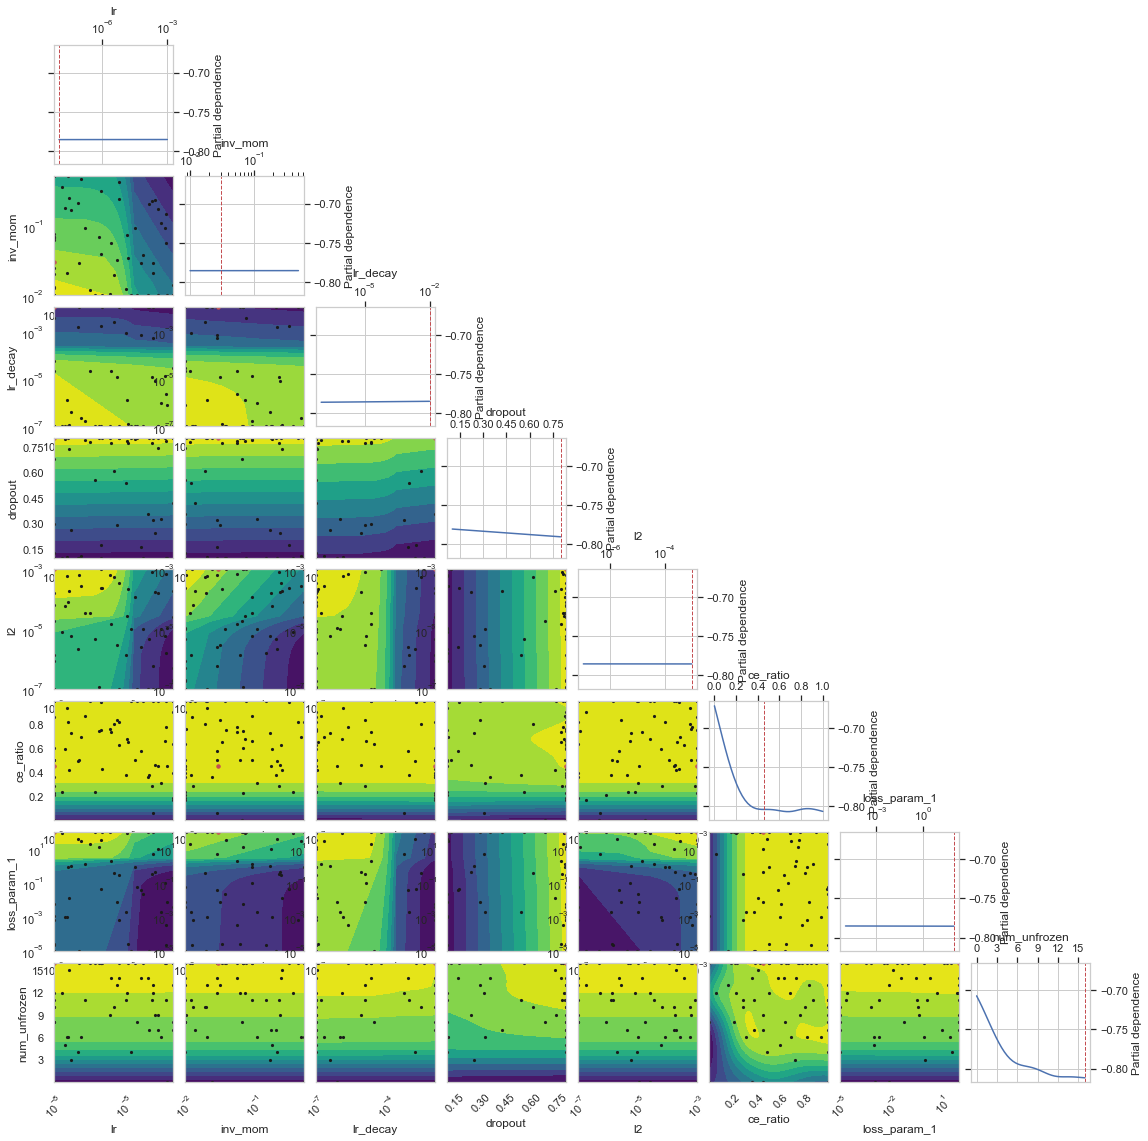

In [14]:
""" Partial dependence plot
Visualise the one dimensional partial dependence of the surrogate model for each dimension. 
The contour plots show the two dimensional partial dependence. 
"""
obj_fig = plot_objective(res)

In [15]:
obj_fig.flatten()[0].figure.savefig("figures/obj_{}.png".format(experiment_id))

In [ ]:
""" Evaluations
The diagonal shows histograms for each of the dimensions. 
The off the diagonal are two dimensional scatter plot of all points are shown. 
The order in which points were evaluated is encoded in the color of each point. 
Darker/purple colors correspond to earlier samples and lighter/yellow colors correspond to later samples. 
A red point shows the location of the minimum found by the optimization process.
"""
eval_fig = plot_evaluations(res, bins=10)